##### MP/BME 573 lecture 30: Receiver Operating Curve (ROC)

In [11]:
## MP 573 lecture 30
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal, ndimage, misc
from skimage.data import shepp_logan_phantom
import scipy.stats as stats

font = {'weight' : 'normal',
        'size'   : 16}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

## Intro: binary classification

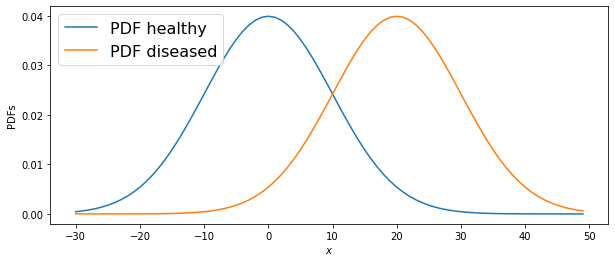

In [12]:
# Define the probability distributions for the health and disease cases
mu_h = 0
mu_d = 20
sigma_h = 10
sigma_d = sigma_h

# Plot the two PDFs, to illustrate overlap (or lack thereof)
xvals = np.arange(-30,50)
pdf_h = stats.norm.pdf(xvals,mu_h,sigma_h)
pdf_d = stats.norm.pdf(xvals,mu_d,sigma_d)

fig,ax = plt.subplots(figsize=(10,4))
plt.rc('font', **font)
plt.plot(xvals,pdf_h)
plt.plot(xvals,pdf_d)
plt.xlabel('$x$');
plt.ylabel('PDFs');
ax.legend(['PDF healthy', 'PDF diseased']);



## ROC Curve 

AUC for our system (empirical):
0.92

AUC for our system (theoretical):
0.92

 AUC for weighted coin toss:
0.50


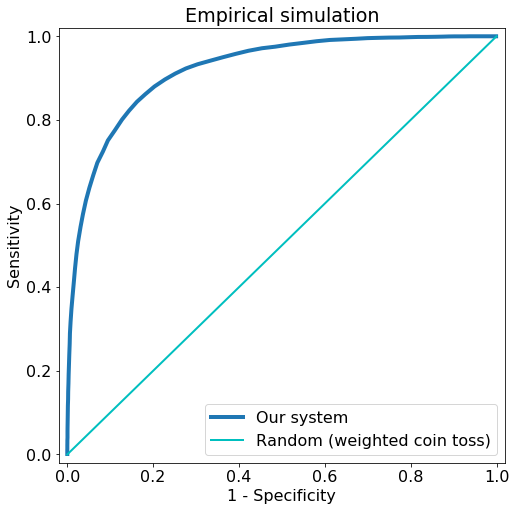

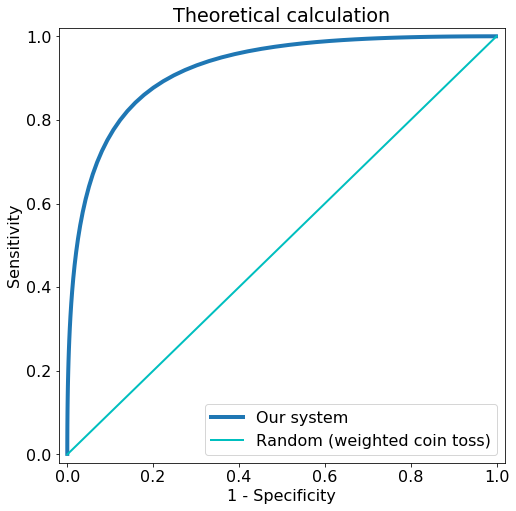

In [13]:
## Empirical sensitivity and specificity
N = 10000
xh = stats.norm.rvs(mu_h, sigma_h, size=N)
xd = stats.norm.rvs(mu_d, sigma_d, size=N)

# Consider a few possible thresholds
v = np.linspace(mu_h-3*sigma_h,mu_d+3*sigma_d,num=101, endpoint=True) # A few thresholds to consider

N_correctpositive = 0*v
N_correctnegative = 0*v
for k in range(v.size):
    N_correctpositive[k] = np.sum(xd > v[k])
    N_correctnegative[k] = np.sum(xh < v[k])
emp_sens = N_correctpositive/N
emp_spec = N_correctnegative/N
fig,ax = plt.subplots(figsize=(8,8))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.plot(1-emp_spec,emp_sens,linewidth=4)
plt.xlim([-0.02,1.02])
plt.ylim([-.02,1.02])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Empirical simulation')

#print(v)
#print(emp_sens)
#print(emp_spec)

# Add the weighted coin ROC curve
p = np.linspace(0,1,101,endpoint=True)
plt.plot(p,p,'c',linewidth=2);
ax.legend(['Our system', 'Random (weighted coin toss)'])

# Let us calculate a simple approximation to AUC
dx = np.abs(np.diff(emp_spec))
meany = 0.5*(emp_sens[0:-1] + emp_sens[1:])
AUC_emp = np.sum(dx*meany)

print('AUC for our system (empirical):')
print(f"{AUC_emp:.2f}")


## Theoretical calculation
sens = 1 - stats.norm.cdf(v,mu_d,sigma_d)
spec = stats.norm.cdf(v,mu_h,sigma_h)

fig,ax = plt.subplots(figsize=(8,8))

plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.plot(1-spec,sens,linewidth=4)
plt.xlim([-0.02,1.02])
plt.ylim([-.02,1.02])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Theoretical calculation')

# Add the weighted coin ROC curve
p = np.linspace(0,1,101,endpoint=True)
plt.plot(p,p,'c',linewidth=2);
ax.legend(['Our system', 'Random (weighted coin toss)'])


# Let us calculate a simple approximation to AUC
dx = np.abs(np.diff(spec))
meany = 0.5*(sens[0:-1] + sens[1:])
AUC_theo = np.sum(dx*meany)

print('\nAUC for our system (theoretical):')
print(f"{AUC_theo:.2f}")


print('\n AUC for weighted coin toss:')
print(f"{0.5:.2f}")
